<a href="https://colab.research.google.com/github/silviusinca/romanian-leaflet-analysis/blob/main/Leaflets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy

In [ ]:
!python --version

Python 3.10.12


# Installers

In [ ]:
!python -m spacy download ro_core_news_sm
!pip install unidecode
!pip install numpy
!pip install matplotlib
!pip install wordcloud

# Initial config

In [2]:
import spacy
import pandas as pd
import unidecode
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import stats
import seaborn as sns

nlp = spacy.load("ro_core_news_sm")
nlp.max_length = 3000000
stopwords = [unidecode.unidecode(word) for word in spacy.lang.ro.stop_words.STOP_WORDS]

# Create vocabulary for frequence method

In [3]:
freq_vocabulary = dict()

def create_freq_vocabulary():
  global freq_vocabulary
  for i in range(8):
    file = open(f'vocabulary/vocabular{i}.txt', "r")
    content = file.read()
    # Tokenize words and perform PoS tagging using spaCy
    doc = nlp(content)
    for token in doc:
        # Check if the token is a verb, adjective, or adverb and not a stopword
        if token.pos_ in {'VERB', 'ADJ', 'ADV'} and token.lemma_ not in stopwords:
            word = token.lemma_
            if word in freq_vocabulary:
                freq_vocabulary[word] += 1
            else:
                freq_vocabulary[word] = 1
    file.close()
    # bias = 5
    freq_vocabulary = {word: count for word, count in freq_vocabulary.items() if count > 5}

create_freq_vocabulary()

# Create vocabulary for Dale method

In [4]:
vocabulary = dict()

def create_vocabulary():
  global vocabulary
  for i in range(8):
    file = open(f'vocabulary/vocabular{i}.txt', "r")
    content = file.read()
    # Tokenize words and perform PoS tagging using spaCy
    doc = nlp(content)
    for token in doc:
      if token.text.isalpha():
        # print(token.text)
        word = token.lemma_
        if word in vocabulary:
          vocabulary[word] += 1
        else:
          vocabulary[word] = 1
    file.close()
    # bias = 5
    vocabulary = {word: count for word, count in vocabulary.items() if count > 5}

create_vocabulary()

# Define first analysis method: complex word frequencies

In [18]:
nlp = spacy.load("ro_core_news_sm")
nlp.max_length = 3000000
stopwords = [unidecode.unidecode(word) for word in spacy.lang.ro.stop_words.STOP_WORDS]

count_complex_romania, count_total_romania = 0, 0
count_complex_poland, count_total_poland = 0, 0
count_complex_gsk, count_total_gsk = 0, 0
count_vocabulary = 0

romania_complex = dict()
poland_complex = dict()
gsk_complex = dict()

# First approach
def process_leaflets(nume_prospect, complex_dict, count_complex = 0, count_total = 0):
  prospect_text = pd.read_csv(nume_prospect)
  for index, row in prospect_text.iterrows():
    for col_value in row:
      # print(col_value)
      # Tokenize words and perform PoS tagging using spaCy
      doc = nlp(col_value)
      for token in doc:
          count_total += 1
          word = token.lemma_
          # Check if the token is a verb, adjective, or adverb and not a stopword
          if token.pos_ in {'VERB', 'ADJ', 'ADV'} and word not in stopwords and word not in freq_vocabulary and word.lower() != 'advil':
              count_complex += 1
              if word in complex_dict:
                  complex_dict[word] += 1
              else:
                  complex_dict[word] = 1
    return count_complex,count_total


def run_first_approach():
  global count_complex_romania, count_total_romania
  global count_complex_poland, count_total_poland
  global count_complex_gsk, count_total_gsk

  count_complex_romania, count_total_romania = process_leaflets('prospecte_romania.csv',romania_complex)
  count_complex_poland, count_total_poland = process_leaflets('prospecte_polonia.csv',poland_complex)
  count_complex_gsk, count_total_gsk = process_leaflets('prospecte_glaxosmithkline.csv',gsk_complex)


def print_first_approach():
  print(f'Romania: {count_complex_romania}, {count_total_romania}')
  print(f'Polonia: {count_complex_poland}, {count_total_poland}')
  print(f'gsk: {count_complex_gsk}, {count_total_gsk}')

  # print(romania_complex)
  # print(poland_complex)
  # print(gsk_complex)


# Run first analysis method

In [19]:
# create_vocabulary()
# print(vocabulary)

run_first_approach()
print_first_approach()

romania_median_complexity = count_complex_romania / count_total_romania * 100
poland_median_complexity = count_complex_poland / count_total_poland * 100
gsk_median_complexity = count_complex_gsk / count_total_gsk * 100
print(romania_median_complexity, poland_median_complexity, gsk_median_complexity)

Romania: 340, 4600
Polonia: 270, 3563
gsk: 291, 2691
7.391304347826087 7.577883805781645 10.813823857302118


# Plot results for first analysis method

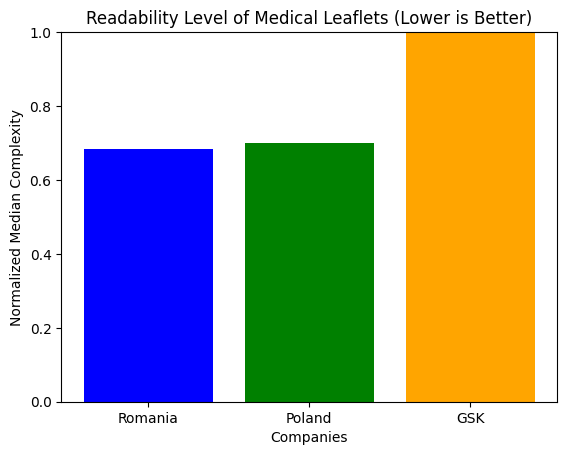

In [7]:
max_value = max(romania_median_complexity, poland_median_complexity, gsk_median_complexity)
romania_median_complexity_normalized = romania_median_complexity / max_value
poland_median_complexity_normalized = poland_median_complexity / max_value
gsk_median_complexity_normalized = gsk_median_complexity / max_value

companies = ['Romania', 'Poland', 'GSK']
median_complexities = [romania_median_complexity_normalized, poland_median_complexity_normalized, gsk_median_complexity_normalized]

plt.bar(companies, median_complexities, color=['blue', 'green', 'orange'])
plt.xlabel('Companies')
plt.ylabel('Normalized Median Complexity')
plt.title('Readability Level of Medical Leaflets (Lower is Better)')
plt.ylim(0, 1)
plt.show()

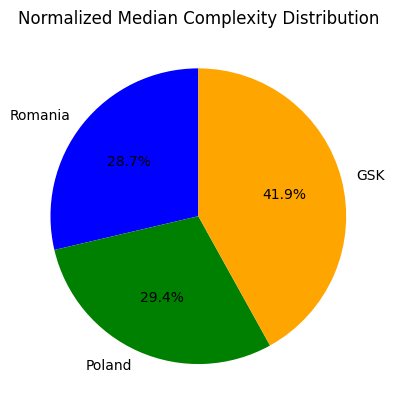

In [8]:
plt.pie(median_complexities, labels=companies, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange'])
plt.title('Normalized Median Complexity Distribution')
plt.show()


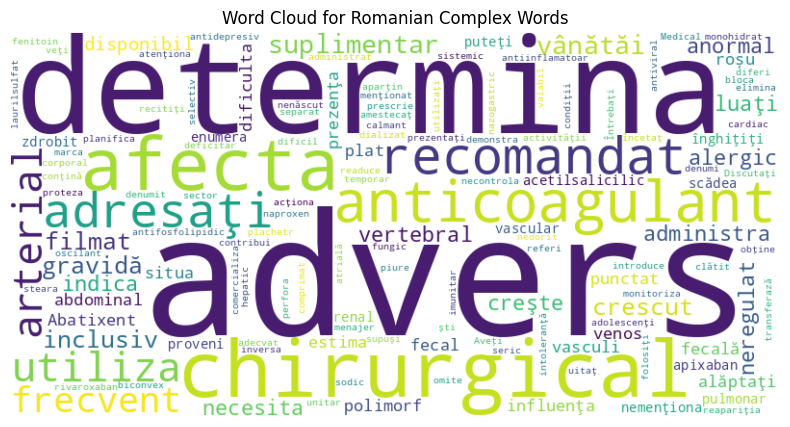

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(romania_complex)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Romanian Complex Words')
plt.show()


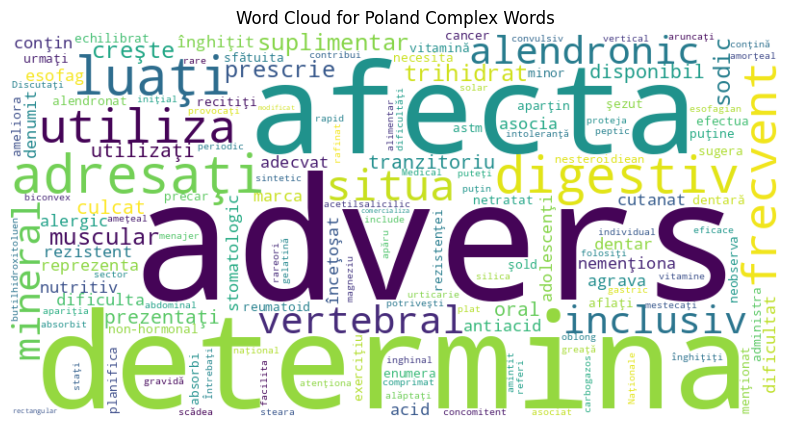

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(poland_complex)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Poland Complex Words')
plt.show()


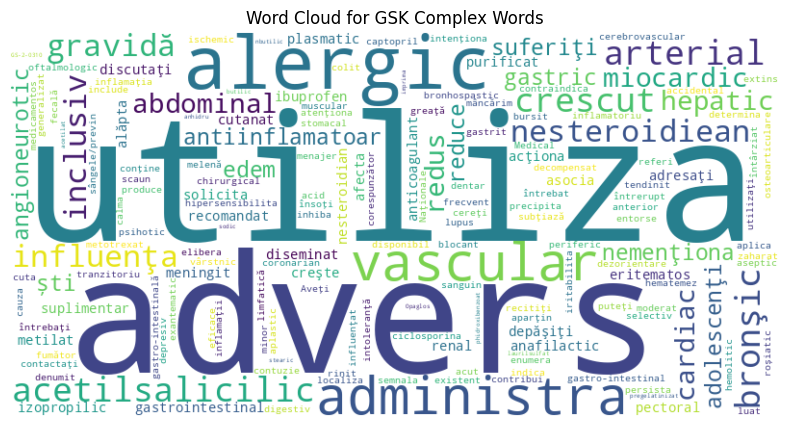

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(gsk_complex)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for GSK Complex Words')
plt.show()


# Define second analaysis method - Dale's formula
## Formula Dale-Chall adaptata pe urmatoarele criterii:
## Raw score = 0.1579\*(PDW) + 0.0496\*(ASL) if the percentage of PDW is less than 5%, otherwise compute
## Raw score = 0.1579\*(PDW) + 0.0496\*(ASL) + 3.6365


*   Raw score = scorul cu care evaluam textul
*   PDW = procentul de cuvinte complexe care nu sunt in vocabularul de baza
*   ASL = lungimea medie a propozitiilor

In [20]:
chunksize = 2000
chunks_romania, complexity_chunks_romania = np.empty((0, chunksize), dtype='<U40'), list()
chunks_polonia, complexity_chunks_polonia = np.empty((0, chunksize), dtype='<U40'), list()
chunks_gsk, complexity_chunks_gsk = np.empty((0, chunksize), dtype='<U40'), list()

def chunks_split_dale(text, chunksize):
  def filter_word(word):
    return word.isalpha()

  complexity_chunks = list()
  word_count, count_sents = 0,0
  count_complex_words = 0
  chunks = np.empty((0, chunksize), dtype='<U40')
  segment = np.empty(chunksize, dtype='<U40')
  index_segment = 0
  for index, row in text.iterrows():
      words = row.iloc[0]
      content = nlp(words)
      for w in content.sents:
        count_sents += 1
        for word in w.sent:
          lemma = word.lemma_
          if filter_word(lemma):
            word_count += 1
          if lemma.lower() not in vocabulary and lemma.isalpha() and lemma not in spacy.lang.ro.stop_words.STOP_WORDS:
            count_complex_words += 1
            # print(lemma)
          if index_segment == chunksize - 1:
            average_length_sents = word_count / count_sents #ASL
            complex_word_percentage = (count_complex_words / word_count) * 100  #PDW
            # raw_score = 64 - 0.95 * complex_word_percentage - 0.69 * average_length_sents
            # print(count_complex_words,  word_count, count_complex_words / word_count, complex_word_percentage, average_length_sents)
            if complex_word_percentage < 5:
              raw_score = 0.1579 * complex_word_percentage + 0.0496 * average_length_sents
            else:
              raw_score = 0.1579 * complex_word_percentage + 0.0496 * average_length_sents + 3.6365
            complexity_chunks.append(raw_score)

            count_complex_words = 0
            word_count = 0
            count_sents = 0
            index_segment = 0

            chunks = np.vstack((chunks,segment))
          #aici vreau sa pun ce cuvinte vreau in chunk-urile alea
          if(filter_word(lemma)):
            segment[index_segment] = lemma
            index_segment += 1

  return (chunks,complexity_chunks)

def run_second_approach():
  global chunks_romania, complexity_chunks_romania
  global chunks_polonia, complexity_chunks_polonia
  global chunks_gsk, complexity_chunks_gsk

  chunks_romania, complexity_chunks_romania = chunks_split_dale(pd.read_csv('prospecte_romania.csv'), 2000)
  chunks_polonia, complexity_chunks_polonia = chunks_split_dale(pd.read_csv('prospecte_polonia.csv'), 2000)
  chunks_gsk, complexity_chunks_gsk = chunks_split_dale(pd.read_csv('prospecte_glaxosmithkline.csv'), 2000)

  chunks_sample_ciresarii, complexity_chunks_sample_ciresarii = chunks_split_dale(pd.read_csv('sample2.csv'), 2000)
  chunks_sample_prince, complexity_chunks_sample_prince = chunks_split_dale(pd.read_csv('sample3.csv'), 2000)


  print('[SAMPLE] Ciresarii Score: ', sum(complexity_chunks_sample_ciresarii)/len(complexity_chunks_sample_ciresarii))

  print('[SAMPLE] Little Prince Score: ', sum(complexity_chunks_sample_prince)/len(complexity_chunks_sample_prince))


# Run second analysis method

In [21]:
run_second_approach()

# print('Romania: ', complexity_chunks_romania)
# print('Poland: ', complexity_chunks_polonia)
# print('GSK: ', complexity_chunks_gsk)

print('Romania Score: ', sum(complexity_chunks_romania)/len(complexity_chunks_romania))
print('Poland Score: ', sum(complexity_chunks_polonia)/len(complexity_chunks_polonia))
print('GSK Score: ', sum(complexity_chunks_gsk)/len(complexity_chunks_gsk))


[SAMPLE] Ciresarii Score:  6.568284606645282
[SAMPLE] Little Prince Score:  6.223922440220505
Romania Score:  10.2172380546041
Poland Score:  10.474540732983243
GSK Score:  9.97651142265883


# T-Test for second analysis method



In [16]:
score_romania = np.array(complexity_chunks_romania)
score_poland = np.array(complexity_chunks_polonia)
score_gsk = np.array(complexity_chunks_gsk)

res_romania_poland = stats.ttest_ind(score_romania, score_poland)
res_romania_gsk = stats.ttest_ind(score_romania, score_gsk)
res_poland_gsk = stats.ttest_ind(score_poland, score_gsk)

print('Romania v Poland p-value, statistic: ', res_romania_poland.pvalue, res_romania_poland.statistic)
print('Romania v GSK p-value, statistic: ', res_romania_gsk.pvalue, res_romania_gsk.statistic)
print('Poland v GSK p-value, statistic: ', res_poland_gsk.pvalue, res_poland_gsk.statistic)

Romania v Poland p-value, statistic:  0.0136855431754127 -2.502596789450564
Romania v GSK p-value, statistic:  0.01461816201622772 2.4820409597836184
Poland v GSK p-value, statistic:  1.6641950810274703e-06 5.03592011603592


# Permutation test

0.1458
0.012
0.0002


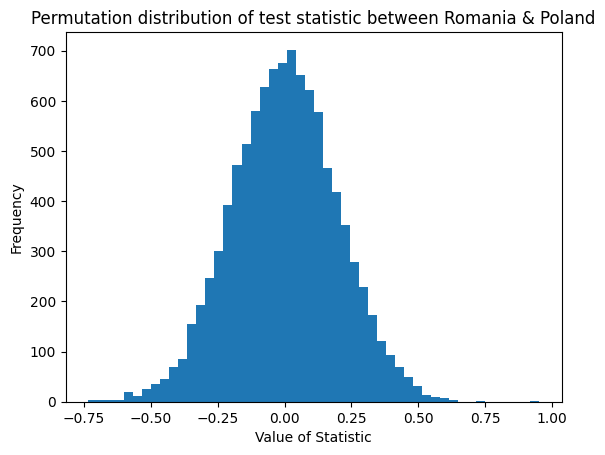

--------------------------------------------------------------------


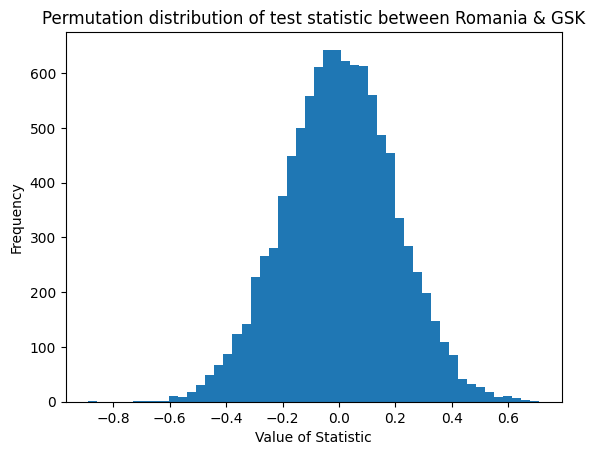

--------------------------------------------------------------------


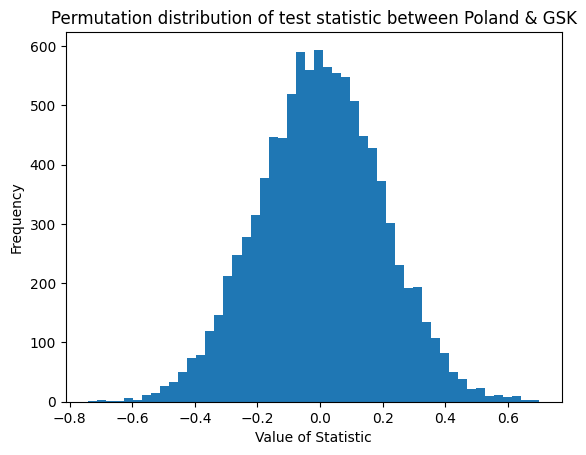

In [17]:
import statistics, math

score_romania_poland = np.array(complexity_chunks_romania + complexity_chunks_polonia)
score_romania_gsk = np.array(complexity_chunks_romania + complexity_chunks_gsk)
score_poland_gsk = np.array(complexity_chunks_polonia + complexity_chunks_gsk)

score_romania = np.array(complexity_chunks_romania)
score_poland = np.array(complexity_chunks_polonia[:53])
score_gsk = np.array(complexity_chunks_gsk[:53])

def statistic(a, b):
  pooled_standard_deviation = math.sqrt(
                      ((len(a) - 1)*statistics.stdev(a) * statistics.stdev(a) +
                     (len(b)-1)*statistics.stdev(b) * statistics.stdev(b)) /
                                  (len(a) + len(b)-2))
  return np.mean(a - b)/pooled_standard_deviation

res_rp = stats.permutation_test((score_romania, score_poland), statistic, batch=50000)
res_rg = stats.permutation_test((score_romania, score_gsk), statistic, batch=50000)
res_pg = stats.permutation_test((score_poland, score_gsk), statistic, batch=50000)

print(res_rp.pvalue)
print(res_rg.pvalue)
print(res_pg.pvalue)

plt.hist(res_rp.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic between Romania & Poland")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()
print('--------------------------------------------------------------------')
plt.hist(res_rg.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic between Romania & GSK")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()
print('--------------------------------------------------------------------')
plt.hist(res_pg.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic between Poland & GSK")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()
